# Mpesa Fraud-Detection

## 1. Business Understanding

### Business Overview

The system is designed to flag potential shell companies by analyzing various data sources, including financial transactions, beneficial ownership, company registration, and payroll records. It leverages machine learning, natural language processing, and network analysis to detect fraud patterns and suspicious behavior. The system provides insights into recurring vendor and employee issues, fraud behaviors, and high-risk transactions. These insights help investigation teams take actions like launching audits, conducting legal proceedings, and improving internal controls to mitigate financial and compliance risks.

### 1.1 Problem Statement

Shell companies are often used for illicit activities such as money laundering, tax evasion, and fraud. Detecting these entities requires analyzing complex financial patterns and ownership structures, making it challenging for organizations to identify and mitigate fraud risks efficiently.

### 1.2 Proposed Solutions

- Officials collaborating with contractors to manipulate the bidding process
- Artificially inflated prices for goods and services
- Contracts awarded at prices significantly above market rates
Shell Companies and Fraudulent Vendors
Use of fake or shell companies to win contracts
Lack of proper vetting for new or suspicious vendors


### 1.3 Objectives

- Detect and flag potential shell companies based on financial transactions and ownership structures.
- Analyze complex patterns such as circular transactions, ownership layering, and high-risk jurisdictions.
- Provide real-time alerts on suspicious activities like sudden fund transfers and unusual vendor relationships.
- Deliver actionable insights to investigation teams, including recurring fraud behaviors and high-risk entities.
- Support decision-making for audits, legal proceedings, and risk mitigation strategies.
Enhance compliance with anti-money laundering (AML) regulations by identifying non-compliant companies.

### 1.4 Metrics of Success

Accuracy = 80%
Recall = 80%

### 1.5 StakeHolders

1. Government Agencies: Entities responsible for regulating financial activities, tax compliance, and public procurement (e.g., anti-fraud units, tax authorities, anti-money laundering bodies).

2. Financial Institutions: Banks, payment processors, and other financial service providers that monitor transactions for fraud and ensure compliance with AML regulations.

3. Corporate Compliance Teams: Internal teams within corporations tasked with ensuring regulatory compliance, identifying fraud risks, and mitigating legal exposure.

4. Auditors and Legal Investigators: Professionals who will use insights from the system to launch audits, investigate fraudulent activities, and initiate legal actions against shell companies.

5. Law Enforcement: Police and specialized financial crime units that handle cases of fraud, money laundering, and other criminal activities related to shell companies.

6. Regulatory Bodies: Organizations overseeing corporate governance, financial compliance, and anti-corruption efforts that would benefit from insights and recommendations provided by the system.

7. Internal Risk Management Teams: Departments within businesses that focus on identifying and managing financial and compliance risks, using the system to prevent and detect fraudulent activities.

8. Technology and Data Science Teams: Teams responsible for implementing and maintaining the fraud detection system, including data scientists, machine learning engineers, and IT personnel.

9. Policy Makers: Government officials who might use the insights from the system to propose reforms or stricter regulations around shell companies and financial fraud.

10. External Audit Firms: Independent audit firms hired by organizations to conduct financial audits and compliance checks based on the data and patterns identified by the system.

### 1.6 Constraints

- Access to real-world, high-quality financial, transactional, and ownership data is limited due to privacy regulations, lack of transparency, or restricted access to government databases.
- Incomplete, outdated, or inaccurate data may impact the effectiveness of machine learning models and the overall fraud detection system.
- Balancing model precision is challenging, as too many false positives may overwhelm investigating teams, while too few could miss critical fraud cases.
- Developing, testing, and refining a fully functional system within a limited timeline may restrict the scope of the project or delay advanced features like NLP or network analysis.
-  Ensuring the security of sensitive financial data and preventing breaches or unauthorized access could add complexity to the system’s design and implementation.

## 2.  Data Understanding

### 2.1 Data Collection

**Data sources**: 

Identify and collect relevant 
data from various sources, like historical fraud 
records, customer information and transaction 
data. Our major sources were Kaggle and 
github repositories.

#### Column Decsription of The data

- step: The time step of the transaction.
- type: The type of transaction (e.g., PAYMENT, TRANSFER, CASH_OUT).
- amount: The transaction amount.
- nameOrig: The originator's account ID.
- oldbalanceOrg: The old balance of the originator before the transaction.
- newbalanceOrig: The new balance of the originator after the transaction.
- nameDest: The destination account ID.
- oldbalanceDest: The old balance of the destination before the transaction.
- newbalanceDest: The new balance of the destination after the transaction.
- isFraud: A binary indicator (0 or 1) showing whether the transaction is fraudulent.
- isFlaggedFraud: A binary indicator for flagged fraudulent transactions.

In [1]:
# Import necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
# A function to load the data
class LoadData():
    def load_data(self,df):
        self.df= pd.read_excel(df)
        return self.df
    
data = LoadData()
data_path = "published_contracts.xlsx"
df = data.load_data(data_path)
# Display teh first five rows in the dataset
df.head()

,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Agpo Certificate Number,Awarded Agpo Group Id,Created By,Terminated,Financial Year,Quarter,Tender Ref.,PE Name,Supplier Name,No. of B.O.I,Created At
0,0015.1,1962488.0,2018-09-26,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-09-26,2018-09-26,2018-09-26,2018-10-25,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,VIABLE DECO SOLUTIONS LIMITED,NaN,2019-01-31 09:55:20
1,38632,257736.0,2018-10-02,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-10-04,2018-10-05,2018-10-08,2018-10-23,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,COMPUTERWAYS LIMITED,NaN,2019-02-19 10:14:13
2,38631,254736.0,2018-09-25,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-19,2018-10-02,2018-10-05,2018-10-12,2018-11-12,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,REALISTIC SYSTEMS AND TECHNOLOGIES,NaN,2019-02-27 14:28:26
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,NaN,NaN,1,NaN,2018/2019,Q3,KEMSA/ONT 06/2017-2019,Embu,JIMRIVER CARGO LOGISTICS LIMITED,NaN,2019-03-15 10:03:54
4,LPO 1079.,81500.0,2018-12-27,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-12-27,2018-12-27,2018-12-27,2018-12-27,2019-01-26,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,MATKY INVESTMENTS,NaN,2019-03-17 18:11:54


In [3]:
class DataUndersatnding():
  
    def load_data(self, path):
        self.df= pd.read_excel(path)
        return self.df
    
    def data_understanding(self, df):
        """Provides the understanding of the dataset"""
        # Dataset Info
        print("INFO")
        print("-"*4)
        self.df.info()

        # Shape of the dataset
        print("\n\nSHAPE")
        print("-" * 4)
        self.df.shape
        print(f"Records in the dataset:{self.df.shape[0]}, and columns in the dataset:{self.df.shape[1]}")

        # Columns in the Dataset
        print("COLUMNS")
        print("-" * 4)
        self.df.columns
        print(f"Number of columns in the dataset{len(self.df.shape)}")

        
        #Unique values in the dataset
        print("\n\nUNIQUE VALUES")
        print("-" * 12)
        for col in self.df.columns:
            print(f"Column {col} has {self.df[col].nunique()} unique values")
            if self.df[col].nunique() < 12:
                print(f"Top unique values in {col} include:")
                for idx in self.df[col].value_counts().index:
                    print(f"- {idx}")
            print("")
        # Missing values in the Dataset
        print("\nMISSING")
        print("-" * 10)
        self.df.isna().sum()

        #Duplicate Values in the dataset
        print("\nDuplicate values in the Dataset")
        print("- "* 4)
        print(f"The dataset has {self.df.duplicated().sum()} duplicated records.")
# Initialize the Data Understanding Class

data = DataUndersatnding()
path ="published_contracts.xlsx"
df = data.load_data(path)
df.head()
        


,Contract Number,Amount,Award Date,Tender Title,Eval Completion Date,Notification Of Award Date,Sign Date,Start Date,End Date,Agpo Certificate Number,Awarded Agpo Group Id,Created By,Terminated,Financial Year,Quarter,Tender Ref.,PE Name,Supplier Name,No. of B.O.I,Created At
0,0015.1,1962488.0,2018-09-26,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-09-26,2018-09-26,2018-09-26,2018-10-25,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,VIABLE DECO SOLUTIONS LIMITED,NaN,2019-01-31 09:55:20
1,38632,257736.0,2018-10-02,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-25,2018-10-04,2018-10-05,2018-10-08,2018-10-23,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,COMPUTERWAYS LIMITED,NaN,2019-02-19 10:14:13
2,38631,254736.0,2018-09-25,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-09-19,2018-10-02,2018-10-05,2018-10-12,2018-11-12,NaN,NaN,1,NaN,2018/2019,Q1,KEMSA/ONT 06/2017-2019,Kenya Post Office Saving Bank,REALISTIC SYSTEMS AND TECHNOLOGIES,NaN,2019-02-27 14:28:26
3,0189,149300.0,2019-02-19,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2019-01-15,2019-02-07,2019-02-11,2019-02-11,2019-03-11,NaN,NaN,1,NaN,2018/2019,Q3,KEMSA/ONT 06/2017-2019,Embu,JIMRIVER CARGO LOGISTICS LIMITED,NaN,2019-03-15 10:03:54
4,LPO 1079.,81500.0,2018-12-27,"Supply of Non Pharmaceuticals (Surgical Tubes,...",2018-12-27,2018-12-27,2018-12-27,2018-12-27,2019-01-26,NaN,NaN,1,NaN,2018/2019,Q2,KEMSA/ONT 06/2017-2019,Higher Education Loan Board,MATKY INVESTMENTS,NaN,2019-03-17 18:11:54


In [5]:
# Call the data understanding function
data.data_understanding(df)

INFO
----
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81549 entries, 0 to 81548
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Contract Number             81477 non-null  object 
 1   Amount                      80715 non-null  float64
 2   Award Date                  81549 non-null  object 
 3   Tender Title                81534 non-null  object 
 4   Eval Completion Date        81549 non-null  object 
 5   Notification Of Award Date  81549 non-null  object 
 6   Sign Date                   69038 non-null  object 
 7   Start Date                  80561 non-null  object 
 8   End Date                    80537 non-null  object 
 9   Agpo Certificate Number     25006 non-null  object 
 10  Awarded Agpo Group Id       24055 non-null  object 
 11  Created By                  81549 non-null  int64  
 12  Terminated                  87 non-null     float64
 13  Financial Year       

### Dataset Summary

The dataset contains 81,549 records and 20 columns with information related to contracts, tenders, suppliers, and awards. Here's a breakdown:

**Key Data Features:**

- Contract Information: Includes contract numbers, amounts, and tender references.
- Dates: Award, evaluation, and signing dates are present.
- Supplier Information: Supplier names, PE (Procuring Entity) names, and AGPO (Access to Government Procurement Opportunities) group identification.
- Award and Financial Details: Contract amounts, termination details, and financial year.

**Unique Values:**

- Contract Number: 65,631 unique contract numbers, indicating many distinct contracts.
- Amount: 50,047 unique values.
- Tender Title: 58,024 unique tender titles.
- Quarter & Financial Year: Information categorized by fiscal years and quarters.

**Missing Data:**

Several columns have missing values, such as Sign Date, Start Date, End Date, and Agpo Certificate Number, indicating incomplete data in many contracts.
Terminated column has very few entries, with only one unique value.

**AGPO Representation:**


Categories include Women, Youth, People with Disabilities (PWD), and All (Youth, Women, PWD).

## 3. Data Preparation

### 3.1 Data Cleaning

#### Identify missing value in the dataset

In [4]:
# handling missing data
print(df.isna().sum())

Contract Number                  72
Amount                          834
Award Date                        0
Tender Title                     15
Eval Completion Date              0
Notification Of Award Date        0
Sign Date                     12511
Start Date                      988
End Date                       1012
Agpo Certificate Number       56543
Awarded Agpo Group Id         57494
Created By                        0
Terminated                    81462
Financial Year                    0
Quarter                        3495
Tender Ref.                      15
PE Name                           0
Supplier Name                     0
No. of B.O.I                  66993
Created At                    33956
dtype: int64


THe dataset has no missing value

#### Checking for duplicates in the Dataset

In [7]:
print(df.duplicated().sum())

134


The dataset has no duplicate values

In [18]:
# Outlier detection and removal
class OutlierDetection():
    def __init__(self):
        pass

    def detect_outliers(self, df):
        self.df = df
        self.df = self.df.select_dtypes(include=[np.number])
        # self.df = self.df.dropna()
        self.z_scores = (self.df - self.df.mean()) / self.df.std()
        self.z_scores = self.z_scores.abs()
        self.df = self.df[(self.z_scores < 3).all(axis=1)]
        return self.df
outlier = OutlierDetection()
df = outlier.detect_outliers(df)
df.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0
5,1,7817.71,53860.0,46042.29,0.0,0.0,0,0
6,1,7107.77,183195.0,176087.23,0.0,0.0,0,0


In [24]:
# Fraud statistics
fraud_count = df['isFraud'].sum()
print(f"\nNumber of fraudulent transactions: {fraud_count}")

avg_amount_fraud = df[df['isFraud'] == 1]['amount'].mean()
avg_amount_non_fraud = df[df['isFraud'] == 0]['amount'].mean()
print(f"Average fraudulent transaction amount: {avg_amount_fraud:.2f}")
print(f"Average non-fraudulent transaction amount: {avg_amount_non_fraud:.2f}")


Number of fraudulent transactions: 0
Average fraudulent transaction amount: nan
Average non-fraudulent transaction amount: 144697.34


### 3.2 Explanatory Data Analysis

#### Histogram

array([[<Axes: title={'center': 'step'}>,
        <Axes: title={'center': 'amount'}>,
        <Axes: title={'center': 'oldbalanceOrg'}>],
       [<Axes: title={'center': 'newbalanceOrig'}>,
        <Axes: title={'center': 'oldbalanceDest'}>,
        <Axes: title={'center': 'newbalanceDest'}>],
       [<Axes: title={'center': 'isFraud'}>,
        <Axes: title={'center': 'isFlaggedFraud'}>, <Axes: >]],
      dtype=object)

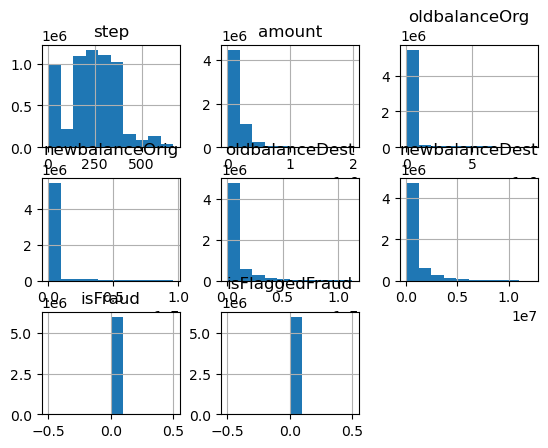

In [22]:
df.hist()

## 4. Modelling

: 

: 

## 5. Conclusion

## 6. Recommendations

## 7. Next Steps

: 

: 